In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
%matplotlib inline
from sklearn.model_selection import GridSearchCV

## datasets

In [2]:
#trainデータ,testデータ,sampleデータの読み込み
train = pd.read_csv('../datasets/train.tsv',delimiter='\t')
test = pd.read_csv('../datasets/test.tsv',delimiter='\t')
sample=pd.read_csv('../datasets/sample_submit.csv',header=None)

In [3]:
train.head()

,id,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Y
0,5,90,Private,313986,11th,7,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,40,United-States,<=50K
1,10,46,Private,74895,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1485,55,United-States,<=50K
2,11,37,Private,67433,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,>50K
3,13,45,Local-gov,144940,Masters,14,Divorced,Prof-specialty,Unmarried,Black,Female,0,0,40,United-States,<=50K
4,14,40,Private,272960,Assoc-acdm,12,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,42,United-States,>50K


In [4]:
train.shape

(16280, 16)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16280 entries, 0 to 16279
Data columns (total 16 columns):
id                16280 non-null int64
age               16280 non-null int64
workclass         16280 non-null object
fnlwgt            16280 non-null int64
education         16280 non-null object
education-num     16280 non-null int64
marital-status    16280 non-null object
occupation        16280 non-null object
relationship      16280 non-null object
race              16280 non-null object
sex               16280 non-null object
capital-gain      16280 non-null int64
capital-loss      16280 non-null int64
hours-per-week    16280 non-null int64
native-country    16280 non-null object
Y                 16280 non-null object
dtypes: int64(7), object(9)
memory usage: 2.0+ MB


In [6]:
num_nan = 10
missing_x = np.random.randint(0, train.shape[0], (num_nan, 1))
missing_y = np.random.randint(0, train.shape[1], (num_nan, 1))

for i, j in zip(missing_x, missing_y):
    train.iloc[i, j] = np.nan

In [7]:
train.dtypes

id                float64
age               float64
workclass          object
fnlwgt            float64
education          object
education-num       int64
marital-status     object
occupation         object
relationship       object
race               object
sex                object
capital-gain      float64
capital-loss        int64
hours-per-week      int64
native-country     object
Y                  object
dtype: object

In [8]:
train[train.isnull().any(axis=1)]

,id,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Y
405,833.0,42.0,Private,355728.0,Assoc-voc,11,Never-married,Craft-repair,Not-in-family,White,Male,NaN,0,44,United-States,<=50K
567,1144.0,NaN,?,244689.0,Some-college,10,Never-married,?,Not-in-family,White,Female,0.0,0,25,United-States,<=50K
2594,NaN,57.0,Private,175017.0,5th-6th,3,Married-civ-spouse,Other-service,Husband,White,Male,0.0,0,40,Italy,<=50K
4862,NaN,26.0,Private,247025.0,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0.0,0,65,United-States,<=50K
4890,9809.0,52.0,Private,NaN,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0,50,United-States,>50K
5927,11891.0,34.0,Private,244147.0,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,NaN,Male,0.0,0,40,?,>50K
6587,13173.0,28.0,?,NaN,Assoc-voc,11,Separated,?,Unmarried,White,Female,0.0,0,40,Mexico,<=50K
9234,18451.0,41.0,Private,110562.0,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0,40,United-States,NaN
11590,23177.0,55.0,Private,100054.0,10th,6,Never-married,Other-service,Not-in-family,NaN,Male,0.0,0,40,United-States,<=50K
15662,31333.0,29.0,Private,213842.0,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,NaN,0.0,0,40,United-States,<=50K


In [9]:
train.dropna(inplace=True)
train.shape

(16270, 16)

In [10]:
Y_mapping={'<=50K':0,'>50K':1}
train['Y']=train['Y'].map(Y_mapping)
train.head()

,id,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Y
0,5.0,90.0,Private,313986.0,11th,7,Never-married,Handlers-cleaners,Own-child,White,Male,0.0,0,40,United-States,0
1,10.0,46.0,Private,74895.0,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,1485,55,United-States,0
2,11.0,37.0,Private,67433.0,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0.0,0,40,United-States,1
3,13.0,45.0,Local-gov,144940.0,Masters,14,Divorced,Prof-specialty,Unmarried,Black,Female,0.0,0,40,United-States,0
4,14.0,40.0,Private,272960.0,Assoc-acdm,12,Married-civ-spouse,Tech-support,Husband,White,Male,0.0,0,42,United-States,1


In [11]:
#列名を取り出す
cols = train.columns
#平均値を取り出す
mean = train.mean()
#標準偏差を取り出す
sigma = train.std()

In [12]:
#元データを_dfにコピー
_df = train
#3σ法の上下限値を設定
low = mean['fnlwgt'] - 3 * sigma['fnlwgt']
high = mean['fnlwgt'] + 3 * sigma['fnlwgt']
#条件での絞り込み
_df = _df[(_df['fnlwgt'] > low) & (_df['fnlwgt'] < high)]

In [13]:
len(_df)

16094

In [14]:
X=_df.iloc[:,1:15]
y=_df['Y']

In [15]:
X=pd.get_dummies(X)
X.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,90.0,313986.0,7,0.0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,46.0,74895.0,12,0.0,1485,55,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,37.0,67433.0,9,0.0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,45.0,144940.0,14,0.0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,40.0,272960.0,12,0.0,0,42,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [16]:
X.shape

(16094, 107)

In [17]:
y.shape

(16094,)

In [18]:
from collections import Counter
print(Counter(y))

Counter({0: 12149, 1: 3945})


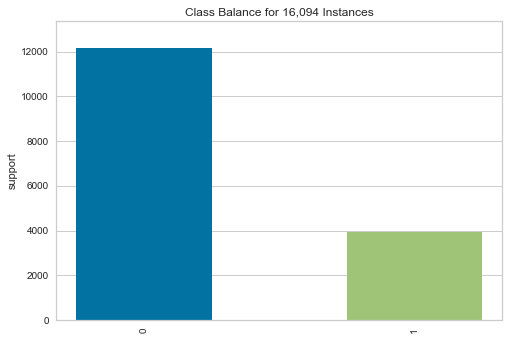

In [19]:
from yellowbrick.target import ClassBalance

visualizer = ClassBalance()
visualizer.fit(y)
plt.xticks(rotation=90)
visualizer.poof()

In [20]:
Xts=test.iloc[:,1:]
Xts.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,30,Private,107793,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,56,United-States
1,39,Private,76767,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,60,United-States
2,28,Self-emp-not-inc,149324,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,7,United-States
3,50,State-gov,276241,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States
4,53,Private,177647,Bachelors,13,Divorced,Exec-managerial,Unmarried,White,Male,0,0,40,United-States


In [21]:
Xts=pd.get_dummies(Xts)
Xts.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,30,107793,10,0,0,56,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,39,76767,10,0,0,60,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,149324,10,0,0,7,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,50,276241,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,53,177647,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [22]:
Xts=Xts.drop('workclass_?',axis=1)
Xts.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,30,107793,10,0,0,56,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,39,76767,10,0,0,60,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,28,149324,10,0,0,7,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,50,276241,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,53,177647,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


## unbalance

In [23]:
from imblearn.over_sampling import SMOTE

/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [24]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_sample(X,y)

In [25]:
X_res.shape

(24298, 107)

In [26]:
y_res.shape

(24298,)

In [27]:
print(Counter(y_res))

Counter({0: 12149, 1: 12149})


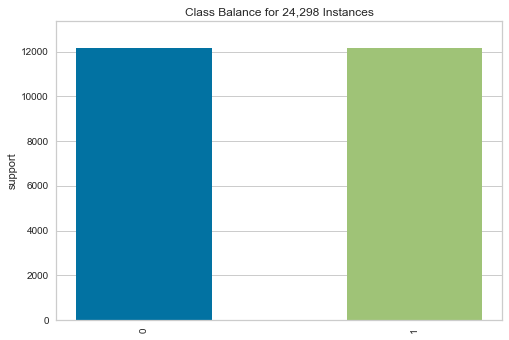

In [28]:
visualizer = ClassBalance()
visualizer.fit(y_res)
plt.xticks(rotation=90)
visualizer.poof()

## K-nn

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [30]:
X = np.array(X_res)
y = np.array(y_res)

# scaling
scaler = StandardScaler()
scaler.fit(X_res)
X = scaler.transform(X_res)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    shuffle=True, random_state=42)

In [34]:
list_score = []
list_nn = []
for k in range(1,31):
    knc_brute = KNeighborsClassifier(n_neighbors=k,algorithm='brute')
    clf=knc_brute
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    list_score.append(acc)
    list_nn.append(k)
    print("[%d] score: {:.2f}".format(acc) % k)

[1] score: 0.85
[2] score: 0.83
[3] score: 0.84
[4] score: 0.83
[5] score: 0.83
[6] score: 0.83
[7] score: 0.83
[8] score: 0.83
[9] score: 0.83
[10] score: 0.83
[11] score: 0.83
[12] score: 0.83
[13] score: 0.83
[14] score: 0.83
[15] score: 0.83
[16] score: 0.83
[17] score: 0.83
[18] score: 0.83
[19] score: 0.83
[20] score: 0.83
[21] score: 0.82
[22] score: 0.83
[23] score: 0.82
[24] score: 0.83
[25] score: 0.82
[26] score: 0.82
[27] score: 0.82
[28] score: 0.82
[29] score: 0.82
[30] score: 0.82


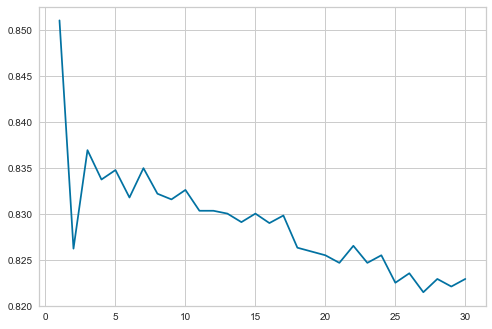

In [35]:
plt.plot(list_nn, list_score)

In [36]:
list_score = []
list_nn = []
for k in range(1,31):
    knc_ball = KNeighborsClassifier(n_neighbors=k,algorithm='ball_tree')
    clf = knc_ball
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    list_score.append(acc)
    list_nn.append(k)
    print("[%d] score: {:.2f}".format(acc) % k)

[1] score: 0.85
[2] score: 0.83
[3] score: 0.84
[4] score: 0.83
[5] score: 0.83
[6] score: 0.83
[7] score: 0.83
[8] score: 0.83
[9] score: 0.83
[10] score: 0.83
[11] score: 0.83
[12] score: 0.83
[13] score: 0.83
[14] score: 0.83
[15] score: 0.83
[16] score: 0.83
[17] score: 0.83
[18] score: 0.83
[19] score: 0.83
[20] score: 0.83
[21] score: 0.82
[22] score: 0.83
[23] score: 0.82
[24] score: 0.83
[25] score: 0.82
[26] score: 0.82
[27] score: 0.82
[28] score: 0.82
[29] score: 0.82
[30] score: 0.82


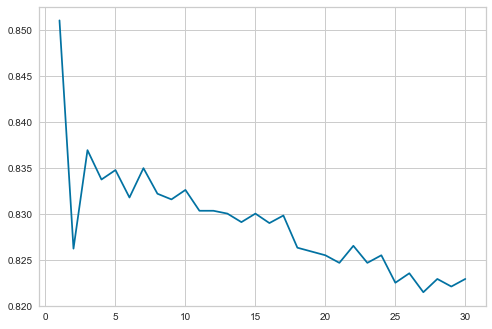

In [37]:
plt.plot(list_nn, list_score)

In [40]:
list_score = []
list_nn = []
for k in range(1,31):
    knc_kd = KNeighborsClassifier(n_neighbors=k,algorithm='kd_tree')
    clf = knc_kd
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    list_score.append(acc)
    list_nn.append(k)
    print("[%d] score: {:.2f}".format(acc) % k)

[1] score: 0.85
[2] score: 0.83
[3] score: 0.84
[4] score: 0.83
[5] score: 0.83
[6] score: 0.83
[7] score: 0.83
[8] score: 0.83
[9] score: 0.83
[10] score: 0.83
[11] score: 0.83
[12] score: 0.83
[13] score: 0.83
[14] score: 0.83
[15] score: 0.83
[16] score: 0.83
[17] score: 0.83
[18] score: 0.83
[19] score: 0.83
[20] score: 0.83
[21] score: 0.82
[22] score: 0.83
[23] score: 0.82
[24] score: 0.83
[25] score: 0.82
[26] score: 0.82
[27] score: 0.82
[28] score: 0.82
[29] score: 0.82
[30] score: 0.82


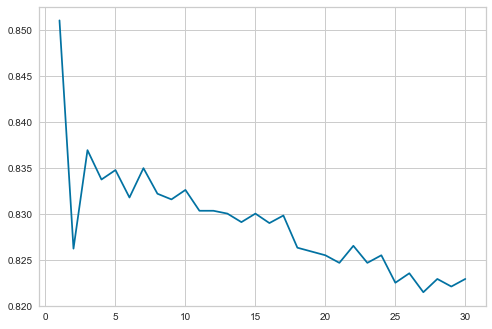

In [41]:
plt.plot(list_nn, list_score)

In [42]:
knc=KNeighborsClassifier(n_neighbors=10,algorithm='brute')
knc.fit(X_train,y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [43]:
y_pred=knc.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[4127,  796],
       [ 831, 3966]])

In [44]:
acc = accuracy_score(y_test, y_pred)
print('Accuracy =', acc)

Accuracy = 0.8326131687242798


In [45]:
knc.fit(X_res,y_res)
y_pred=knc.predict(Xts)
sample[1]=y_pred
sample_mapping={0:'<=50K',1:'>50K'}
sample[1]=sample[1].map(sample_mapping)
sample.to_csv("../submit/tax_submit_k-nn.csv", header = None, index = None)

## Decision Tree

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
clf_DT=DecisionTreeClassifier(criterion='gini',max_depth=10)
clf_DT=clf_DT.fit(X_train,y_train)

y_pred=clf_DT.predict(X_test)
score=accuracy_score(y_test,y_pred)
print(score)

0.8799382716049383


In [55]:
import pydotplus
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO

In [56]:
dot = StringIO()
export_graphviz(clf_DT, out_file = dot)
graph = pydotplus.graph_from_dot_data(dot.getvalue())
graph.write_pdf("../graph/graph_gini.pdf")

True

In [57]:
clf_DT=DecisionTreeClassifier(criterion='entropy',max_depth=10)
clf_DT=clf_DT.fit(X_train,y_train)

y_pred=clf_DT.predict(X_test)
score=accuracy_score(y_test,y_pred)
print(score)

0.8761316872427983


In [58]:
dot = StringIO()
export_graphviz(clf_DT, out_file = dot)
graph = pydotplus.graph_from_dot_data(dot.getvalue())
graph.write_pdf("../graph/graph_entropy.pdf")

True

In [59]:
clf_DT=clf_DT.fit(X_res,y_res)
y_pred=clf_DT.predict(Xts)
dot = StringIO()
export_graphviz(clf_DT, out_file = dot)
graph = pydotplus.graph_from_dot_data(dot.getvalue())
graph.write_pdf("../graph/graph_2.pdf")
sample[1]=y_pred
sample_mapping={0:'<=50K',1:'>50K'}
sample[1]=sample[1].map(sample_mapping)
sample.to_csv("../submit/tax_submit_DT.csv", header = None, index = None)